# Questao 2

## a)

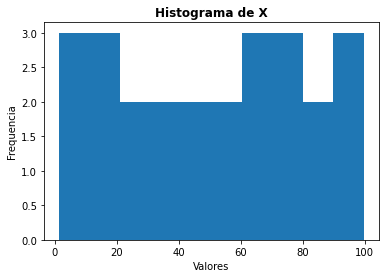

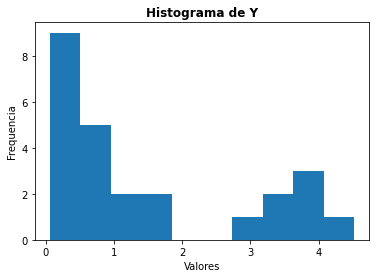

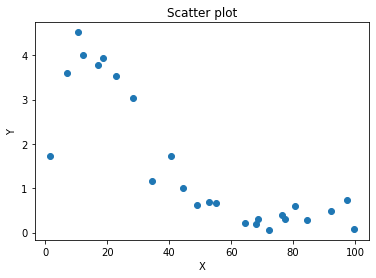

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import bootstrap


x_list = np.array([84.30,97.30,10.73,80.65,34.49,77.40,52.94,22.92,76.30,99.65,92.08,1.49,16.88,72.23,28.23,55.22,12.15,49.12,64.32,40.68,68.76,44.34,6.89,18.78,68.15], dtype=np.float64)
y_list = np.array([0.28,0.74,4.52,0.60,1.17,0.31,0.70,3.53,0.40,0.08,0.48,1.73,3.77,0.06,3.03,0.67,4.01,0.63,0.21,1.72,0.31,1.01,3.60,3.95,0.20], dtype=np.float64)

#sigma = 0.25
#sigma = np.std(x_list) # Definindo sigma como sigma de X
#sigma = np.std(y_list)
n = len(x_list)
sig = [random.uniform(0, 2) for _ in range(500)]


np.random.seed(42)
random.seed(42)

plt.hist(x_list)
plt.title('Histograma de X',fontweight ="bold")
plt.xlabel('Valores')
plt.ylabel('Frequencia')
plt.show()
plt.hist(y_list)
plt.title('Histograma de Y',fontweight ="bold")
plt.xlabel('Valores')
plt.ylabel('Frequencia')
plt.show()
plt.scatter(x_list,y_list)
plt.title('Scatter plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

**a)** Realizando o ajuste do modelo aos dados

Vamos realizar o *fitting* ou ajuste da curva aos dados observados, utilizando a função curve_fit, que realiza isso através do método de mínimos quadrados não-lineares.

In [2]:
# Definição da função base que gera os valores de Y
def base_func(x, beta_1, beta_2):
  return beta_1 * x * np.exp((-1)*beta_2*x)


Definimos a função base de Y, sem os valores de erro, pois os mesmos são passados na função de ajuste da curva, através do parâmetro sigma.

Com isso, conseguimos ajustar o modelo aos dados observados.

In [3]:
err_sum = 999
best_params = [0,0,0]
for sigma in sig:
  params, p_cov = curve_fit(base_func, x_list, y_list, sigma=np.random.normal(0,sigma,n), absolute_sigma=True, bounds=(0, +np.inf))

  beta_1, beta_2 = params
  p_err = np.sqrt(np.diag(p_cov))
  if p_err[0]+p_err[1]<err_sum:
    err_sum = p_err[0]+p_err[1]
    best_params = beta_1, beta_2, sigma

In [4]:
beta_1, beta_2, sigma = best_params

print("Valor de Beta1: ",beta_1,"\nValor de Beta2: ",beta_2,"\nValor de sigma: ",sigma)


Valor de Beta1:  1.222225486364666 
Valor de Beta2:  0.1003063875804432 
Valor de sigma:  0.0001716126025701481


In [5]:
print("Equação ajustada:\nY = %.3f" %beta_1,"x*exp(%.3f" %-beta_2,"x) + e")

Equação ajustada:
Y = 1.222 x*exp(-0.100 x) + e


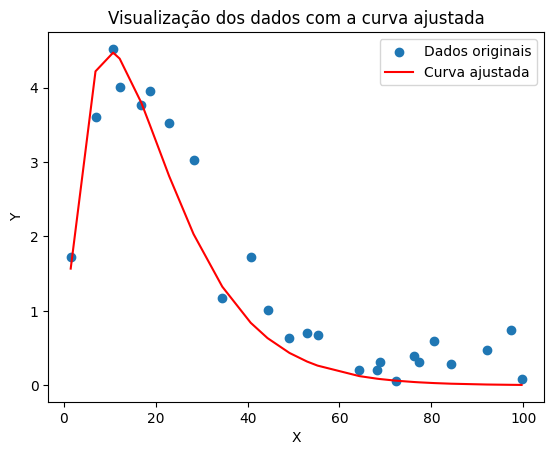

In [6]:
plt.scatter(x_list,y_list, label='Dados originais')
xsort = np.sort(x_list)
plt.plot(xsort, base_func(xsort, beta_1, beta_2), c='r', label='Curva ajustada')
plt.title('Visualização dos dados com a curva ajustada')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Graficamente, é possível observar que o modelo faz um ajuste relativamente bom aos dados.

(OBS: a curva ajustada não é completamente suave e parece ser composta de segmentos em algumas regiões devido ao número baixo de n)

## b)

Vamos utilizar a função *bootstrap* para calcular o erro padrão dos parâmetros *beta_1* e *beta_2* encontrados anteriormente.